[Reference](https://medium.com/@akarabaev96/are-you-using-the-shap-library-to-its-full-potential-bb45efce2c9)

In [1]:
pip install shap==0.41.0 xgboost==1.7.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [2]:
import shap

X, y = shap.datasets.adult()

In [3]:
import xgboost

model = xgboost.XGBClassifier(n_estimators=20)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [4]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Shap Cohort Plots

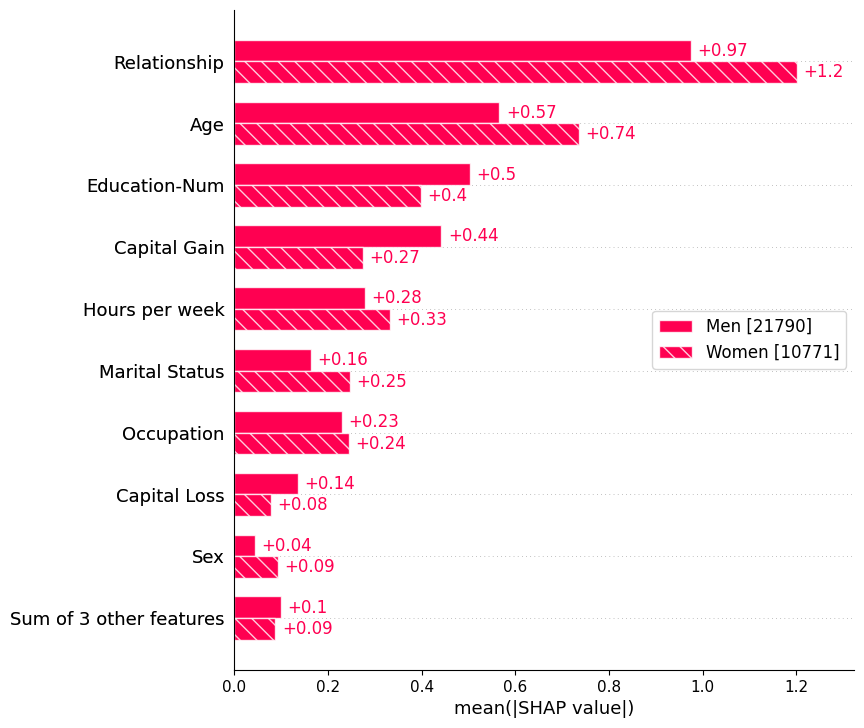

In [5]:
# shap_values and X variables were created during preparatory steps
import shap

sex = (
    X['Sex']
    .apply(lambda sex: 'Women' if sex == 0 else 'Men')
    .values
)

shap.plots.bar(shap_values.cohorts(sex).abs.mean(axis=0))

Marking Highly Correlated Variables on Shap Plots

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


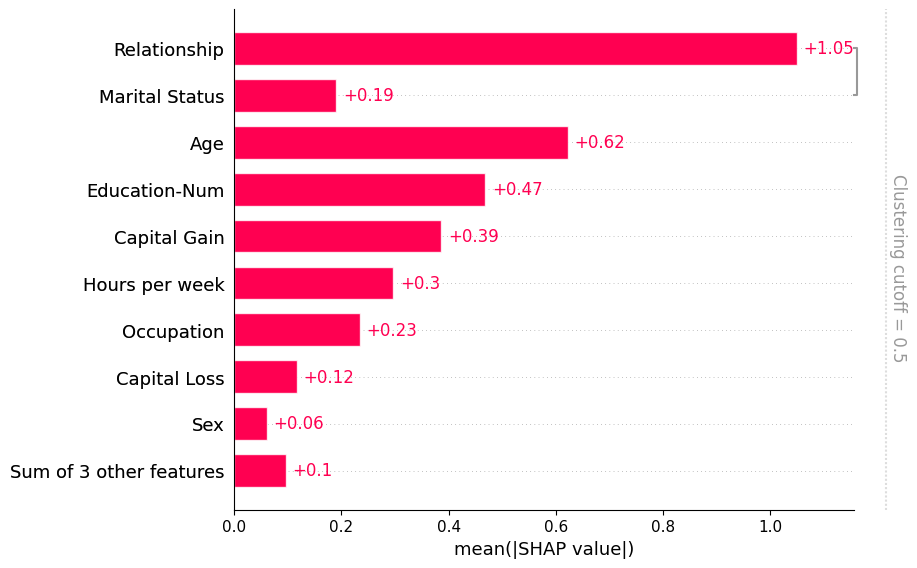

In [6]:
# shap_values, X and y variables were created during preparatory steps

import shap

clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.5)

Shap dependence plots

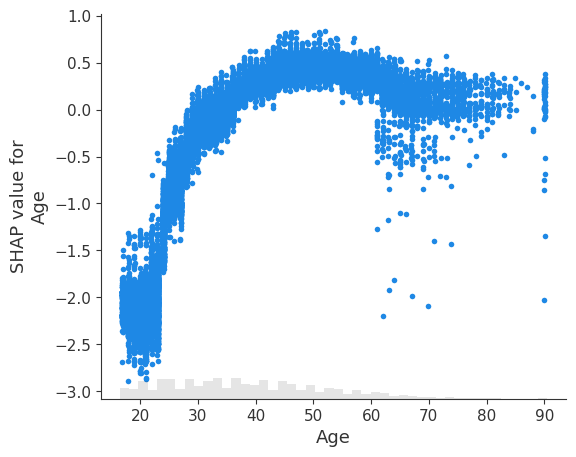

In [7]:
# shap_values variable was created during preparatory steps

import shap

shap.plots.scatter(shap_values[:, 'Age'])

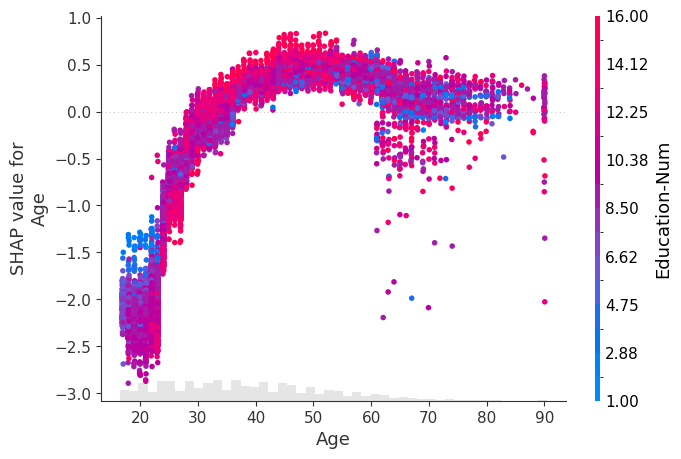

In [8]:
# shap_values variable was created during preparatory steps

import shap

shap.plots.scatter(shap_values[:, 'Age'], color=shap_values[:, 'Education-Num'])

Shap Interactive Force Plots

In [9]:
# shap_values variable was created during preparatory steps

import shap

shap.initjs()
# Here only 1000 observations are visualized, because this plot is quite heavy
# and can crash your Jupyter Notebook
shap.plots.force(shap_values[:1000])